# WQD7005 - Data Mining
## MIDTERM EXAM

### Matrix Number : 17043640

### Name                 : Gunasegarran Magadevan

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

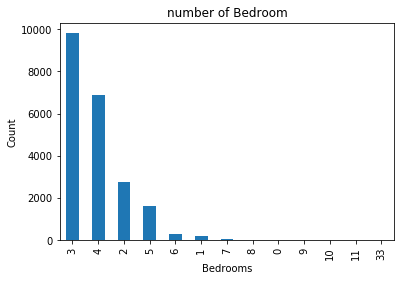

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assign url of file: url
url = 'https://files.osf.io/v1/resources/bvn42/providers/osfstorage/5db1b6360db187000c3a7c04?action=download&direct&version=1'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=",")

df.to_csv('HouseData.csv')

# Print the head of the DataFrame
print(df.head())

print(df.describe())

# Plot first column of df
df['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine
plt.savefig('number of Bedroom.jpg')

In [2]:
# Finding the correlation of the dataset 

correlations = df.corr()['bedrooms'].drop('bedrooms')
print(correlations)

id               0.001286
price            0.308350
bathrooms        0.515884
sqft_living      0.576671
sqft_lot         0.031703
floors           0.175429
waterfront      -0.006582
view             0.079532
condition        0.028472
grade            0.356967
sqft_above       0.477600
sqft_basement    0.303093
yr_built         0.154178
yr_renovated     0.018841
zipcode         -0.152668
lat             -0.008931
long             0.129473
sqft_living15    0.391638
sqft_lot15       0.029244
Name: bedrooms, dtype: float64


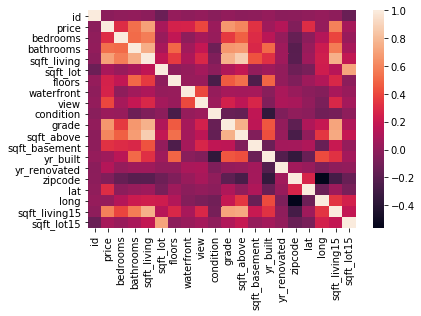

<Figure size 432x288 with 0 Axes>

In [3]:
# Draw a heatmap and obtaining a detailed diagram of the correlation

import seaborn as sns
sns.heatmap(df.corr())
plt.show()
plt.savefig('correlations.jpg', dpi=400)

In [4]:
# Obtaining the features that have a correlation that is above the threshold value 

def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations


In [5]:
# taking features with correlation more than 0.08 as input x and 'bedrooms' as target variable y 
features = get_features(0.08) 
print(features) 
x = df[features] 
y = df['bedrooms']

['price', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'long', 'sqft_living15']


In [6]:
# Obtaining the new dataset after eliminating the columns correlation less than 0.08
new_df= df.loc[:, features]
print(new_df)
print(new_df.columns)

          price  bathrooms  sqft_living  floors  grade  sqft_above  \
0      221900.0       1.00         1180     1.0      7        1180   
1      538000.0       2.25         2570     2.0      7        2170   
2      180000.0       1.00          770     1.0      6         770   
3      604000.0       3.00         1960     1.0      7        1050   
4      510000.0       2.00         1680     1.0      8        1680   
...         ...        ...          ...     ...    ...         ...   
21608  360000.0       2.50         1530     3.0      8        1530   
21609  400000.0       2.50         2310     2.0      8        2310   
21610  402101.0       0.75         1020     2.0      7        1020   
21611  400000.0       2.50         1600     2.0      8        1600   
21612  325000.0       0.75         1020     2.0      7        1020   

       sqft_basement  yr_built  zipcode     long  sqft_living15  
0                  0      1955    98178 -122.257           1340  
1                400      1

In [7]:
col_missing = new_df.isnull().sum()
print(col_missing)

price            0
bathrooms        0
sqft_living      0
floors           0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
long             0
sqft_living15    0
dtype: int64


In [8]:
# Since there is no missing data, we will deliberately add missing data into the dataset 

import random
new_df2 = new_df.to_csv(r'HouseData.csv',index=False)
new_df3 = pd.read_csv(r'HouseData.csv')

nan_percent = {'id':0.10, 'price':0.10, 'bathrooms':0.10, 'sqft_living':0.10, 'sqft_lot':0.10, 'floors':0.10, 
                        'waterfront':0.10, 'view':0.10, 'condition':0.10, 'grade':0.10, 'sqft_above':0.10, 
                                    'sqft_basement':0.10, 'yr_built':0.10, 'yr_renovated':0.10, 'zipcode':0.10, 
                                    'lat':0.10, 'long':0.10, 'sqft_living15':0.10, 'sqft_lot15':0.10}  
for col in new_df3:                         
    for i, row_value in new_df3[col].iteritems():
        if random.random() <= nan_percent[col]:              
            new_df3[col][i] = np.nan
new_df3.to_csv(r'HouseDataMissing.csv',index=False)
new_df4 = pd.read_csv(r'HouseDataMissing.csv')
new_df4.to_csv('HouseDataMissing.csv')
print(new_df4)

/Users/gunasegarranmagadevan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/gunasegarranmagadevan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


          price  bathrooms  sqft_living  floors  grade  sqft_above  \
0      221900.0        NaN       1180.0     1.0    7.0      1180.0   
1      538000.0       2.25       2570.0     2.0    7.0      2170.0   
2      180000.0       1.00        770.0     1.0    6.0       770.0   
3      604000.0       3.00       1960.0     1.0    7.0      1050.0   
4      510000.0       2.00       1680.0     1.0    8.0      1680.0   
...         ...        ...          ...     ...    ...         ...   
21608  360000.0       2.50       1530.0     3.0    8.0      1530.0   
21609  400000.0       2.50       2310.0     2.0    8.0      2310.0   
21610  402101.0       0.75       1020.0     2.0    7.0         NaN   
21611  400000.0       2.50       1600.0     NaN    8.0      1600.0   
21612  325000.0       0.75       1020.0     2.0    7.0         NaN   

       sqft_basement  yr_built  zipcode     long  sqft_living15  
0                0.0    1955.0      NaN -122.257         1340.0  
1              400.0    195

In [9]:
# Determining the number of missing values in each column 

col_missing = new_df4.isnull().sum()
print(col_missing)

price            2196
bathrooms        2220
sqft_living      2201
floors           2160
grade            2171
sqft_above       2229
sqft_basement    2151
yr_built         2260
zipcode          2161
long             2071
sqft_living15    2106
dtype: int64


In [10]:
# Imputing the missing values with the mean of each column 

new_df7 = new_df4.fillna(new_df4.mean())
print(new_df7)

          price  bathrooms  sqft_living    floors  grade   sqft_above  \
0      221900.0   2.114732       1180.0  1.000000    7.0  1180.000000   
1      538000.0   2.250000       2570.0  2.000000    7.0  2170.000000   
2      180000.0   1.000000        770.0  1.000000    6.0   770.000000   
3      604000.0   3.000000       1960.0  1.000000    7.0  1050.000000   
4      510000.0   2.000000       1680.0  1.000000    8.0  1680.000000   
...         ...        ...          ...       ...    ...          ...   
21608  360000.0   2.500000       1530.0  3.000000    8.0  1530.000000   
21609  400000.0   2.500000       2310.0  2.000000    8.0  2310.000000   
21610  402101.0   0.750000       1020.0  2.000000    7.0  1785.880623   
21611  400000.0   2.500000       1600.0  1.494422    8.0  1600.000000   
21612  325000.0   0.750000       1020.0  2.000000    7.0  1785.880623   

       sqft_basement     yr_built       zipcode     long  sqft_living15  
0                0.0  1955.000000  98077.989153 -

In [11]:
# Before data integration
url_house = 'https://files.osf.io/v1/resources/bvn42/providers/osfstorage/5db1b6360db187000c3a7c04?action=download&direct&version=1'

house_df = pd.read_csv(url_house, sep=",")
print(house_df)
house_column = list(house_df.columns) 

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [12]:
# Data Integration
import pandas as pd

print(house_column)

house_df = pd.read_csv(url_house, sep=",")
new_df5 = pd.merge(df, house_df, on = (['id', 'date', 'price', 'bathrooms', 'sqft_living', 
                                        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                                        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 
                                        'lat', 'long', 'sqft_living15', 'sqft_lot15']))
new_df6 = new_df5.loc[:, ['id', 'date', 'price', 'bedrooms_y', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                          'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
                          'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
print(new_df6)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
               id             date     price  bedrooms_y  bathrooms  \
0      7129300520  20141013T000000  221900.0           3       1.00   
1      6414100192  20141209T000000  538000.0           3       2.25   
2      5631500400  20150225T000000  180000.0           2       1.00   
3      2487200875  20141209T000000  604000.0           4       3.00   
4      1954400510  20150218T000000  510000.0           3       2.00   
...           ...              ...       ...         ...        ...   
21608   263000018  20140521T000000  360000.0           3       2.50   
21609  6600060120  20150223T000000  400000.0           4       2.50   
21610  1523300141  20140623T000000  402101.0           2       0.75   
21611   291310100  20150116T000000  400000.0

In [13]:
# Before data transformation
print(new_df7)
print(list(new_df7.columns))

          price  bathrooms  sqft_living    floors  grade   sqft_above  \
0      221900.0   2.114732       1180.0  1.000000    7.0  1180.000000   
1      538000.0   2.250000       2570.0  2.000000    7.0  2170.000000   
2      180000.0   1.000000        770.0  1.000000    6.0   770.000000   
3      604000.0   3.000000       1960.0  1.000000    7.0  1050.000000   
4      510000.0   2.000000       1680.0  1.000000    8.0  1680.000000   
...         ...        ...          ...       ...    ...          ...   
21608  360000.0   2.500000       1530.0  3.000000    8.0  1530.000000   
21609  400000.0   2.500000       2310.0  2.000000    8.0  2310.000000   
21610  402101.0   0.750000       1020.0  2.000000    7.0  1785.880623   
21611  400000.0   2.500000       1600.0  1.494422    8.0  1600.000000   
21612  325000.0   0.750000       1020.0  2.000000    7.0  1785.880623   

       sqft_basement     yr_built       zipcode     long  sqft_living15  
0                0.0  1955.000000  98077.989153 -

In [14]:
# Normalize the dataset 
import pandas as pd
from sklearn import preprocessing

x = new_df7.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_df5 = pd.DataFrame(x_scaled)
new_df5.columns = ['price', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'long', 'sqft_living15']
print(new_df5)

          price  bathrooms  sqft_living    floors     grade  sqft_above  \
0      0.019266   0.264342     0.067170  0.000000  0.500000    0.089602   
1      0.060721   0.281250     0.172075  0.400000  0.500000    0.199115   
2      0.013770   0.125000     0.036226  0.000000  0.416667    0.044248   
3      0.069377   0.375000     0.126038  0.000000  0.500000    0.075221   
4      0.057049   0.250000     0.104906  0.000000  0.583333    0.144912   
...         ...        ...          ...       ...       ...         ...   
21608  0.037377   0.312500     0.093585  0.800000  0.583333    0.128319   
21609  0.042623   0.312500     0.152453  0.400000  0.583333    0.214602   
21610  0.042898   0.093750     0.055094  0.400000  0.500000    0.156624   
21611  0.042623   0.312500     0.098868  0.197769  0.583333    0.136062   
21612  0.032787   0.093750     0.055094  0.400000  0.500000    0.156624   

       sqft_basement  yr_built   zipcode      long  sqft_living15  
0           0.000000  0.478261 

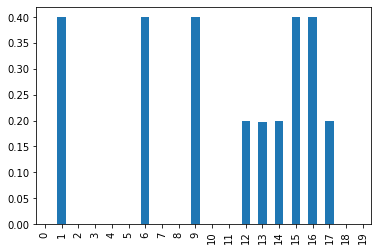

In [15]:
# Plotting the normalized dataframe

## Taking the first 20 in the 'floors' column 
new_df5['floors'].head(20).plot(kind='bar')

In [16]:
# Standardize the data
  
from sklearn.preprocessing import StandardScaler
features = ['price', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'long', 'sqft_living15']
new_df6[['price', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'long', 'sqft_living15']] = new_df6[['price', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'long', 'sqft_living15']].apply(pd.to_numeric)
new_df6 = new_df6.astype({"bedrooms_y": str})
# Separating out the features
x = new_df6.loc[:, features].values
# Separating out the target
y = new_df6.loc[:,['bedrooms_y']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [17]:
# Dimension reduction process using Principle Component Analysis (PCA)

## PCA Projection to 2D
### 9 columns (4D) into 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)
finalDf = pd.concat([principalDf, new_df6[['bedrooms_y']]], axis = 1)
print(finalDf)

       principal component 1  principal component 2
0                  -2.780171               0.330768
1                  -0.089641               0.918673
2                  -2.516141              -0.636841
3                  -1.007941               2.025100
4                  -0.222785              -1.047851
...                      ...                    ...
21608               0.237680              -1.073149
21609               0.594853              -0.181787
21610              -2.124710              -0.814835
21611               0.334607              -2.057799
21612              -2.197749              -0.871952

[21613 rows x 2 columns]
       principal component 1  principal component 2 bedrooms_y
0                  -2.780171               0.330768          3
1                  -0.089641               0.918673          3
2                  -2.516141              -0.636841          2
3                  -1.007941               2.025100          4
4                  -0.222785       

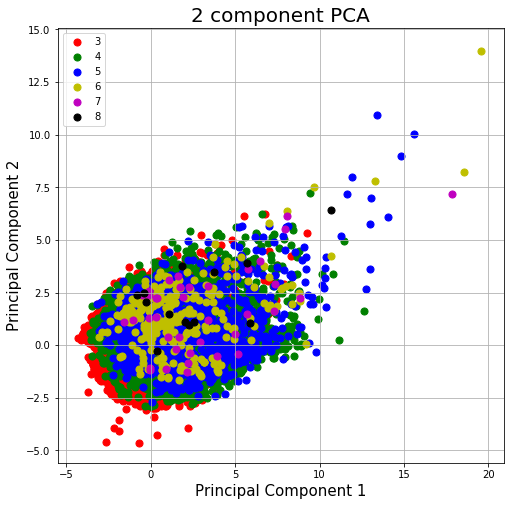

In [18]:
# Visualize 2D Projection
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
bedrooms = ['3', '4', '5','6','7','8']
colors = ['r', 'g', 'b', 'y', 'm', 'k']
for bedrooms1, color in zip(bedrooms,colors):
    indicesToKeep = finalDf['bedrooms_y'] == bedrooms1 
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(bedrooms)
ax.grid()

plt.savefig('2 component PCA.jpg')